In [1]:
from sceptic import sceptic
import numpy as np
import pandas as pd
from sklearn import preprocessing


In [2]:

# Load your data
data_concat = np.loadtxt("../../example_data/scGEM/expression.txt")
y =np.loadtxt("../../example_data/scGEM/expression_type.txt")


In [3]:

# Convert labels to categorical values
lab = preprocessing.LabelEncoder()
label = lab.fit_transform(y)

time_dictionary = {1.0:8, 2.0:16, 3.0:24,  4.0:30, 0.0:0}
y = pd.Series(np.unique(label)).map(time_dictionary).to_numpy()
label_list = np.transpose(np.unique(y))


# Define parameter search space
parameters = {'kernel': ('linear', 'rbf'), 'C': [0.1, 1, 10]}

# Call the function to perform SVM and evaluation
cm, label_predicted, pseudotime, sceptic_prob = sceptic.run_sceptic_and_evaluate(data_concat, label, label_list, parameters)



In [4]:
# # Save results
# np.savetxt('test/scGEM/label-predicted-sceptic.txt', label_predicted, fmt='%i')
# np.savetxt('test/scGEM/cm-sceptic.txt', cm, fmt='%i')
# np.savetxt('test/scGEM/pseudotime-sceptic.txt', pseudotime, fmt='%1.4e')
# np.savetxt('test/scGEM/sceptic_probability.txt', sceptic_prob, fmt='%1.5e')


In [5]:
print(np.unique(y))

class_labels = np.unique(y)

[ 0  8 16 24 30]


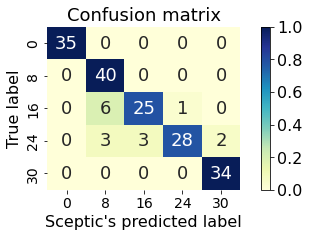

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

 
# Define font size for annotations
annotation_font_size = 18

# Create the confusion matrix (cm) and labels as per your data

fig, axs = plt.subplots(ncols=2, gridspec_kw=dict(width_ratios=[4, 0.2]), figsize=(4, 3))

# Plot the heatmap for Sceptic's predicted label
ax = sns.heatmap(
    cm / cm.sum(axis=1, keepdims=1),
    annot=cm,
    cmap="YlGnBu",
    cbar=False,
    ax=axs[0],
    xticklabels=class_labels,#[0, 3, 7, 11, 21],
    yticklabels=class_labels,#[0, 3, 7, 11, 21],
    fmt='.0f',
    annot_kws={"fontsize": annotation_font_size}
)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=14)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)
ax.set_xlabel("Sceptic's predicted label", fontsize=16)

# Create the colorbar
cbar = fig.colorbar(axs[0].collections[0], cax=axs[1])
cbar.ax.tick_params(labelsize=16)

# Set labels and title
ax.set_ylabel("True label", fontsize=16)
ax.set_title("Confusion matrix", fontsize=18)

# Save the plot as a PDF with tight layout
#plt.savefig("cm_example3.pdf", bbox_inches='tight')

# Show the plot
plt.show()


In [7]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt



# Create a DataFrame with pseudotime as samples and time as the group
df = pd.DataFrame({
    'Pseudotime': pseudotime,
    'Time': pd.Series(label).map(time_dictionary).to_numpy()
})


/net/noble/vol1/home/gangliuw/.local/lib/python3.7/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/net/noble/vol1/home/gangliuw/.local/lib/python3.7/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/net/noble/vol1/home/gangliuw/.local/lib/python3.7/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/net/noble/vol1/home/gangliuw/.local/lib/python3.7/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting

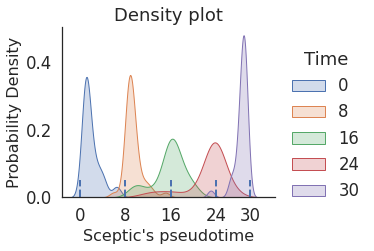

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the Seaborn style and font scale
sns.set(style="white", font_scale=1.5)

# Create the FacetGrid for the KDE plots
g = sns.FacetGrid(df, hue="Time", aspect=1.3)

# Plot the KDE plots by time category
g.map(sns.kdeplot, "Pseudotime", shade=True)

# Add a legend with the day categories
g.add_legend(title="Time", labels=class_labels)

# Customize the figure size
fig = plt.gcf()
fig.set_size_inches(6, 4)


plt.xticks(y, class_labels)
plt.vlines(y, 0, 0.05, linewidth=2, linestyle='--')


# Add labels and a title
plt.xlabel("Sceptic's pseudotime", fontsize=16)
plt.ylabel("Probability Density", fontsize=16)
plt.title("Density plot", fontsize=18)

# Save the plot as a PDF with tight layout
#plt.savefig("density_example3.pdf", bbox_inches='tight')

# Show the plot
plt.show()